From Given Data Set Buliding a Model to predict the survial using various algorithm 

### Author: Saurabh Nigam

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

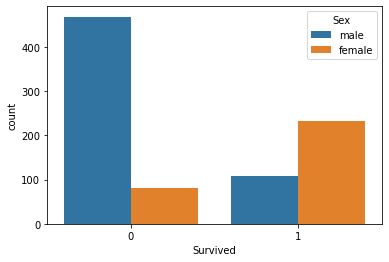

In [7]:
sns.countplot(x="Survived",hue='Sex',data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

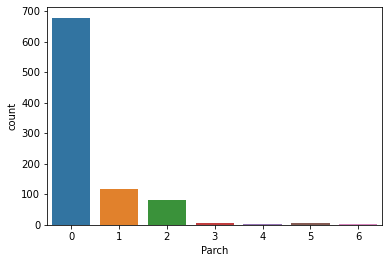

In [8]:
sns.countplot(x="Parch",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

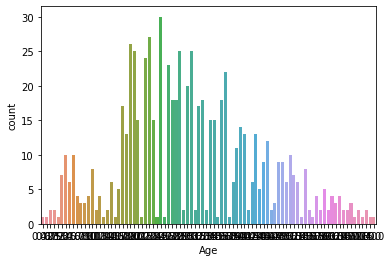

In [9]:
sns.countplot(x="Age",data=df)

<AxesSubplot:>

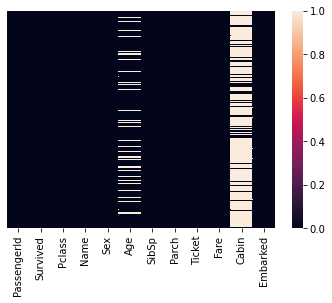

In [10]:
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df.dropna(inplace=True)

### Converting some columns value to desried form using one hot Encoding

In [14]:
Sex=pd.get_dummies(df['Sex'])

In [15]:
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
Sex=pd.get_dummies(df['Sex'],drop_first=True)

In [17]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
Embarked=pd.get_dummies(df['Embarked'])

In [19]:
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [20]:
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
Pclass=pd.get_dummies(df['Pclass'])

In [22]:
Pclass=pd.get_dummies(df['Pclass'],drop_first=True)

In [23]:
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
df=pd.concat([df,Pclass,Embarked,Sex],axis=1)

In [25]:
df.drop(['Name','Sex','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [26]:
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,2,3,Q,S,male
0,1,0,3,22.0,1,0,0,1,0,1,1
1,2,1,1,38.0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,0,1,0,1,0
3,4,1,1,35.0,1,0,0,0,0,1,0
4,5,0,3,35.0,0,0,0,1,0,1,1


In [27]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

Fitting a model Using Logistic Regression

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Dhruv Singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting the model

In [30]:
pred=model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7897196261682243

In [32]:
from sklearn import metrics

In [33]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       126
           1       0.75      0.74      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



Confusion Metrics

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,pred)

array([[104,  22],
       [ 23,  65]], dtype=int64)

Decesion Tree Classifeir


In [36]:
from sklearn import tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

we will Build a model Using Desciontreeclassifier using default criteria gini,other include Entropy 

In [38]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

## Scoring our Decision Tree

In [39]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

1.0
0.7663551401869159


### Reducing over Fitting (Regularization)

In [40]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=1)
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.8032128514056225
0.7990654205607477


### Ensemble Technique Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
bgcl= BaggingClassifier(n_estimators=50,base_estimator=dtree,random_state=1)
bgcl.fit(x_train,y_train)
y_pred=bgcl.predict(x_test)
print(bgcl.score(x_test,y_test))

0.7990654205607477


### Ensemble Technique AdaBoosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
Adab= AdaBoostClassifier(n_estimators=5,base_estimator=dtree,random_state=1)
Adab.fit(x_train,y_train)
y_pred=Adab.predict(x_test)
print(Adab.score(x_test,y_test))

0.780373831775701


### Ensemble Technique Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
Grad_B= GradientBoostingClassifier(n_estimators=20,random_state=1)
Grad_B.fit(x_train,y_train)
y_pred=Grad_B.predict(x_test)
print(Grad_B.score(x_test,y_test))

0.7897196261682243
